In [1]:
import sys, os
sys.path.append(os.path.abspath('../../../../classifiers'))
sys.path.append(os.path.abspath('../../../../training'))
sys.path.append(os.path.abspath('../../../../validation'))
from validation_functions import execute_training_test_k_fold
from classifiers_ICQ import iqc_classifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
range_step = 50
k_times_fold = 10

In [3]:
iris = datasets.load_iris()

y = iris.target
X = PCA(n_components=4).fit_transform(iris.data)[:, :]

In [4]:
dic_classifier_params = {}
dic_classifier_params["sigma_q_params"] = [1,1,1,1]
dic_classifier_params["use_polar_coordinates_on_sigma_q"] = False
dic_classifier_params["load_inputvector_env_state"] = True
dic_classifier_params["normalize_axis"] = 1

In [5]:
dic_training_params = {"max_iter": 1000,
    "accuracy_succ": 0.99,
    "plot_graphs_and_metrics": False,
    "plot_graphs_in_classifier": False,
    "random_seed": 1,
    "learning_rate": 0.01,
    "do_classes_refit":True,
    "reset_weights_epoch":0,
    "batch":1}

In [6]:
%run ../printing_methods.ipynb

In [7]:
negativities_per_class = []
entropies_per_class = []
for clazz in range(len(set(y))):
    negativities_per_class.append([])
    entropies_per_class.append([])

In [8]:
%%time
scores_list = []
f1scores_list = []

for max_iter in range(1, 1000, range_step):
    dic_training_params["max_iter"] = max_iter
    scores, f1scores, output_dict = execute_training_test_k_fold(
                    X, 
                    y, 
                    k_folds=k_times_fold,
                    random_seed=1, 
                    classifier_function=iqc_classifier, 
                    dic_classifier_params=dic_classifier_params,
                    one_vs_classifier=OneVsRestClassifier, 
                    dic_training_params=dic_training_params,
                    print_each_fold_metric=True,
                    print_avg_metric=True)
    scores_list.append(np.mean(scores))
    f1scores_list.append(np.mean(f1scores))

    for clazz in range(len(set(y))):
        negativities_per_class[clazz].append(np.mean(output_dict["negativities"][clazz]))
        entropies_per_class[clazz].append(np.mean(output_dict["entropies"][clazz]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #0
Mean negativities for all classes: [0.16280551622354267, 0.1156030410589278, 0.12957519715094235]
Mean entropies for all classes: [2.6814629829096238e-15, 4.180916589824572e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.1195212038847758, 0.12137942851484781, 0.1184865394356289]
Mean entropies for all classes: [1.677253545121902e-15, 2.2547014568413787e-15, 2.6612123003307584e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.14749661080870338, 0.13815730699449566, 0.13575124070632877]
Mean entropies for all classes: [3.6134869896069e-15, 3.3617482234990795e-15, 2.2991829488771195e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.15065770048828753, 0.12117216186267503, 0.12733403674667468]
Mean entropies for all classes: [3.604791941917549e-15, 3.617743582097072e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #4
Mean negativities for all classes: [0.11978666092763743, 0.071882142760977, 0.08125468603058371]
Mean entropies for all classes: [3.248475831913287e-15, 3.4612687323600984e-15, 2.9629296200091586e-15]
              precision    recall  f1-score   support

           0       0.33   

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #5
Mean negativities for all classes: [0.11584034218352164, 0.09412681020485753, 0.1006247593568518]
Mean entropies for all classes: [2.2608769201006562e-15, 2.5892823658856148e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #6
Mean negativities for all classes: [0.1548224910401163, 0.1423931505010552, 0.13999412259604124]
Mean entropies for all classes: [2.142404214887081e-15, 2.5846391555419974e-15, 2.510716887635775e-15]
              precision    recall  f1-score   support

           0       0.33   

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #7
Mean negativities for all classes: [0.12931726406413369, 0.125909211253173, 0.12107158306350298]
Mean entropies for all classes: [2.5219358454086434e-15, 3.3049593301868753e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #8
Mean negativities for all classes: [0.1545737723758869, 0.10491563076204918, 0.12174629902402219]
Mean entropies for all classes: [2.714258754889636e-15, 2.9646331569828185e-15, 2.8047313710267205e-15]
              precision    recall  f1-score   support

           0       0.38  

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #9
Mean negativities for all classes: [0.14726653680535756, 0.1415192281447317, 0.14126982630726692]
Mean entropies for all classes: [3.3444247640070276e-15, 2.2441268751709763e-15, 3.3872962807559906e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4000000000000001 F1-Scores = 0.2717590544989926 Negativity = [0.1359945848111376, 0.11979572394508416, 0.1404683861698426] Entropy = [3.597022987211963e-15, 2.197722434098013e-15, 3.091472720661033e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.2144151119599729, 0.1791076587275901, 0.12957519715094235]
Mean entropies for all classes: [2.532598787513686e-15, 3.2151221656263414e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13387344271105672, 0.10139726006534767, 0.049337735970777126]
Mean entropies for all classes: [4.52837605128306e-15, 2.414029737397291e-15, 3.466022800937521e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.1316638478778322, 0.13689763157164467, 0.06726786552713425]
Mean entropies for all classes: [3.725065006272145e-15, 2.7168997558291765e-15, 2.675792015871603e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.48      0.47      0.40        15
weighted avg       0.48      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18809658068681698, 0.13413071630206044, 0.12733403674667468]
Mean entropies for all classes: [4.50558377884375e-15, 1.9273924106756194e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.1714068764126008, 0.16258324704728708, 0.02337394241195579]
Mean entropies for all classes: [1.3225084152252969e-15, 2.812966312008737e-15, 4.165456186075654e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.36        15
weighted avg       0.45      0.40      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.14909054228648197, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [3.526404440576184e-15, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1943047420657155, 0.13819291204962875, 0.13999412259604124]
Mean entropies for all classes: [3.305842456237453e-15, 2.3172991168387434e-15, 2.510716887635775e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.15762333473346135, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [8.844374134761344e-16, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.20051921605014186, 0.16034643672560125, 0.12174629902402219]
Mean entropies for all classes: [3.5058785360076834e-15, 2.8930314250480993e-15, 2.8047313710267205e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.17484910009955063, 0.12948773962999865, 0.03967918937106414]
Mean entropies for all classes: [4.6324626773325085e-15, 3.2159080977888988e-15, 2.529916621914426e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.40      0.57         5
           2       1.00      0.20      0.33         5

    accuracy                           0.53        15
   macro avg       0.81      0.53      0.50        15
weighted avg       0.81      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.47333333333333333 F1-Scores = 0.39197691569982596 Negativity = [0.17436598927950178, 0.09486947958239383, 0.1119431149922037] Entropy = [3.2254701140139064e-15, 3.4694761965392905e-15, 3.0392522593243085e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.2144151119599729, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [2.532598787513686e-15, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13387344271105672, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [4.52837605128306e-15, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.1316638478778322, 0.13689763157164467, 0.022727316311387396]
Mean entropies for all classes: [3.725065006272145e-15, 2.7168997558291765e-15, 2.965232418613369e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18809658068681698, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [4.50558377884375e-15, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.1714068764126008, 0.16258324704728708, 0.024724533619871467]
Mean entropies for all classes: [1.3225084152252969e-15, 2.812966312008737e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.45      0.33      0.28        15
weighted avg       0.45      0.33      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.14909054228648197, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [3.526404440576184e-15, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1943047420657155, 0.13819291204962875, 0.13999412259604124]
Mean entropies for all classes: [3.305842456237453e-15, 2.3172991168387434e-15, 2.510716887635775e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.15762333473346135, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [8.844374134761344e-16, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.20051921605014186, 0.16034643672560125, 0.19911880576563165]
Mean entropies for all classes: [3.5058785360076834e-15, 2.8930314250480993e-15, 3.757815734328253e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    7.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.17484910009955063, 0.12948773962999865, 0.03967918937106414]
Mean entropies for all classes: [4.6324626773325085e-15, 3.2159080977888988e-15, 2.529916621914426e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.40      0.57         5
           2       1.00      0.20      0.33         5

    accuracy                           0.53        15
   macro avg       0.81      0.53      0.50        15
weighted avg       0.81      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.4007638749279616 Negativity = [0.17917537733454447, 0.1364346367658157, 0.09709626525362142] Entropy = [3.464355758109392e-15, 3.221079222213114e-15, 3.135732393571564e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.2144151119599729, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [2.532598787513686e-15, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13387344271105672, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [4.52837605128306e-15, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.1316638478778322, 0.13689763157164467, 0.022727316311387396]
Mean entropies for all classes: [3.725065006272145e-15, 2.7168997558291765e-15, 2.965232418613369e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18809658068681698, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [4.50558377884375e-15, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.13046580689208753, 0.16258324704728708, 0.024724533619871467]
Mean entropies for all classes: [-2.1422579109381148e-15, 2.812966312008737e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.45      0.33      0.28        15
weighted avg       0.45      0.33      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.14909054228648197, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [3.526404440576184e-15, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1943047420657155, 0.13819291204962875, 0.13999412259604124]
Mean entropies for all classes: [3.305842456237453e-15, 2.3172991168387434e-15, 2.510716887635775e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.15762333473346135, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [8.844374134761344e-16, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.20051921605014186, 0.16034643672560125, 0.19911880576563165]
Mean entropies for all classes: [3.5058785360076834e-15, 2.8930314250480993e-15, 3.757815734328253e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.17484910009955063, 0.12948773962999865, 0.03967918937106414]
Mean entropies for all classes: [4.6324626773325085e-15, 3.2159080977888988e-15, 2.529916621914426e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.40      0.57         5
           2       1.00      0.20      0.33         5

    accuracy                           0.53        15
   macro avg       0.81      0.53      0.50        15
weighted avg       0.81      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.4007638749279616 Negativity = [0.17917537733454447, 0.1364346367658157, 0.09709626525362142] Entropy = [3.464355758109392e-15, 3.221079222213114e-15, 3.135732393571564e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.22314505830496198, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [-7.324688933155917e-15, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13387344271105672, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [4.52837605128306e-15, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.1316638478778322, 0.13689763157164467, 0.11301478190388581]
Mean entropies for all classes: [3.725065006272145e-15, 2.7168997558291765e-15, 7.499412606489453e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.48      0.47      0.40        15
weighted avg       0.48      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18809658068681698, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [4.50558377884375e-15, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.13046580689208753, 0.16258324704728708, 0.024724533619871467]
Mean entropies for all classes: [-2.1422579109381148e-15, 2.812966312008737e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.45      0.33      0.28        15
weighted avg       0.45      0.33      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.1325109357963847, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [-8.083776239468203e-15, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1943047420657155, 0.13819291204962875, 0.13999412259604124]
Mean entropies for all classes: [3.305842456237453e-15, 2.3172991168387434e-15, 2.510716887635775e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1639637679096017, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [-1.6561039394390085e-14, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.20051921605014186, 0.16034643672560125, 0.19911880576563165]
Mean entropies for all classes: [3.5058785360076834e-15, 2.8930314250480993e-15, 3.757815734328253e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.17484910009955063, 0.12948773962999865, 0.03967918937106414]
Mean entropies for all classes: [4.6324626773325085e-15, 3.2159080977888988e-15, 2.529916621914426e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.40      0.57         5
           2       1.00      0.20      0.33         5

    accuracy                           0.53        15
   macro avg       0.81      0.53      0.50        15
weighted avg       0.81      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4666666666666667 F1-Scores = 0.39418513231980723 Negativity = [0.18208535944954082, 0.1364346367658157, 0.12719208711778754] Entropy = [1.7859318455285742e-16, 3.221079222213114e-15, 4.647125789530259e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.22314505830496198, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [-7.324688933155917e-15, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.15078396193941507, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [-3.535896092222525e-15, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.1316638478778322, 0.13689763157164467, 0.11301478190388581]
Mean entropies for all classes: [3.725065006272145e-15, 2.7168997558291765e-15, 7.499412606489453e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.48      0.47      0.40        15
weighted avg       0.48      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18809658068681698, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [4.50558377884375e-15, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.17364505677771697, 0.16258324704728708, 0.024724533619871467]
Mean entropies for all classes: [-8.528826541136984e-15, 2.812966312008737e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.47      0.40      0.31        15
weighted avg       0.47      0.40      0.31        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.1325109357963847, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [-8.083776239468203e-15, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.22191301682867184, 0.13819291204962875, 0.13999412259604124]
Mean entropies for all classes: [1.8451319072054316e-15, 2.3172991168387434e-15, 2.510716887635775e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1566125052243064, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [2.709160225000428e-15, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.1882626800008065, 0.16034643672560125, 0.19911880576563165]
Mean entropies for all classes: [2.4378879051571027e-15, 2.8930314250480993e-15, 3.757815734328253e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.17484910009955063, 0.12948773962999865, 0.2071247055489364]
Mean entropies for all classes: [4.6324626773325085e-15, 3.2159080977888988e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4666666666666667 F1-Scores = 0.384925873060548 Negativity = [0.18208535944954082, 0.14207147650860177, 0.12719208711778754] Entropy = [1.7859318455285742e-16, 5.329885077112528e-16, 4.647125789530259e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.2289455186719158, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [-2.5634269893496545e-16, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.15078396193941507, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [-3.535896092222525e-15, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.1316638478778322, 0.13689763157164467, 0.11301478190388581]
Mean entropies for all classes: [3.725065006272145e-15, 2.7168997558291765e-15, 7.499412606489453e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.48      0.47      0.40        15
weighted avg       0.48      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   24.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18809658068681698, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [4.50558377884375e-15, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.17364505677771697, 0.16258324704728708, 0.024724533619871467]
Mean entropies for all classes: [-8.528826541136984e-15, 2.812966312008737e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.47      0.40      0.31        15
weighted avg       0.47      0.40      0.31        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.12515981834513534, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [1.474251848369935e-14, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.29        15
weighted avg       0.31      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.194941624057083, 0.13819291204962875, 0.13999412259604124]
Mean entropies for all classes: [-1.187397431971647e-14, 2.3172991168387434e-15, 2.510716887635775e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.16903560351465502, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [1.740351642661854e-14, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.1610280077086185, 0.16034643672560125, 0.19911880576563165]
Mean entropies for all classes: [4.6728323935024685e-15, 2.8930314250480993e-15, 3.757815734328253e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   23.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.17484910009955063, 0.12948773962999865, 0.2071247055489364]
Mean entropies for all classes: [4.6324626773325085e-15, 3.2159080977888988e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4666666666666667 F1-Scores = 0.3860151976792844 Negativity = [0.1840188462385254, 0.14207147650860177, 0.12719208711778754] Entropy = [2.5347085959598414e-15, 5.329885077112528e-16, 4.647125789530259e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.2133667680856072, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [3.529774956602211e-14, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.42      0.53      0.44        15
weighted avg       0.42      0.53      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.15078396193941507, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [-3.535896092222525e-15, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.19181792927122673, 0.13689763157164467, 0.11301478190388581]
Mean entropies for all classes: [1.07112240507547e-14, 2.7168997558291765e-15, 7.499412606489453e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.48      0.47      0.40        15
weighted avg       0.48      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18809658068681698, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [4.50558377884375e-15, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.15080264125294912, 0.16258324704728708, 0.024724533619871467]
Mean entropies for all classes: [-4.3294427323306e-14, 2.812966312008737e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      0.20      0.33         5
           2       0.40      0.80      0.53         5

    accuracy                           0.53        15
   macro avg       0.72      0.53      0.51        15
weighted avg       0.72      0.53      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.12515981834513534, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [1.474251848369935e-14, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.29        15
weighted avg       0.31      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.2029184938807028, 0.13819291204962875, 0.1466025116358581]
Mean entropies for all classes: [-7.141462396464602e-15, 2.3172991168387434e-15, 1.0496182500502469e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.16903560351465502, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [1.740351642661854e-14, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.1610280077086185, 0.16034643672560125, 0.19911880576563165]
Mean entropies for all classes: [4.6728323935024685e-15, 2.8930314250480993e-15, 3.757815734328253e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.16696305575627435, 0.12948773962999865, 0.2071247055489364]
Mean entropies for all classes: [3.495994852390471e-14, 3.2159080977888988e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.4050184656531406 Negativity = [0.17882592937642258, 0.14207147650860177, 0.1472434475822524] Entropy = [1.4386072684278863e-14, 5.329885077112528e-16, 6.975845471024444e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.2133667680856072, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [3.529774956602211e-14, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.42      0.53      0.44        15
weighted avg       0.42      0.53      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.15078396193941507, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [-3.535896092222525e-15, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.19181792927122673, 0.13689763157164467, 0.06580956746864515]
Mean entropies for all classes: [1.07112240507547e-14, 2.7168997558291765e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18809658068681698, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [4.50558377884375e-15, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.15386449849733277, 0.16258324704728708, 0.024724533619871467]
Mean entropies for all classes: [2.6389614269701612e-14, 2.812966312008737e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.20      0.33         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.81      0.53      0.50        15
weighted avg       0.81      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1229904918267664, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [-2.2661578014893912e-15, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.29        15
weighted avg       0.31      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.2029184938807028, 0.13819291204962875, 0.1466025116358581]
Mean entropies for all classes: [-7.141462396464602e-15, 2.3172991168387434e-15, 1.0496182500502469e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.13408442592356543, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [-5.0764057310324595e-15, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.1610280077086185, 0.16034643672560125, 0.19911880576563165]
Mean entropies for all classes: [4.6728323935024685e-15, 2.8930314250480993e-15, 3.757815734328253e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   31.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2107217018648918, 0.12948773962999865, 0.2071247055489364]
Mean entropies for all classes: [1.7380100744071007e-14, 3.2159080977888988e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.40962630879039547 Negativity = [0.17882592937642258, 0.14207147650860177, 0.13150837610383884] Entropy = [1.4386072684278863e-14, 5.329885077112528e-16, 3.615447027631331e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.23176613106321706, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [5.684824342608815e-15, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.42      0.53      0.44        15
weighted avg       0.42      0.53      0.44        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.14397776619750957, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [5.700029326079937e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.12397855398464944, 0.13689763157164467, 0.06580956746864515]
Mean entropies for all classes: [-5.9778397833616355e-15, 2.7168997558291765e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18809658068681698, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [4.50558377884375e-15, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.39        15
weighted avg       0.33      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.15386449849733277, 0.16258324704728708, 0.024724533619871467]
Mean entropies for all classes: [2.6389614269701612e-14, 2.812966312008737e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.20      0.33         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.81      0.53      0.50        15
weighted avg       0.81      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.13155035925130898, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [-1.3323360439437826e-14, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.14166895932747328, 0.13819291204962875, 0.08024806006683013]
Mean entropies for all classes: [-8.377430425650543e-15, 2.3172991168387434e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.79      0.47      0.41        15
weighted avg       0.79      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.13408442592356543, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [-5.0764057310324595e-15, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   35.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.1610280077086185, 0.09464383397782244, 0.19911880576563165]
Mean entropies for all classes: [4.6728323935024685e-15, 2.5470058453049822e-15, 3.757815734328253e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2107217018648918, 0.12948773962999865, 0.2071247055489364]
Mean entropies for all classes: [1.7380100744071007e-14, 3.2159080977888988e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5 F1-Scores = 0.4262047647341764 Negativity = [0.18495905036895918, 0.1398027445946333, 0.10889525100831308] Entropy = [4.515097609807768e-15, 2.0711718292051883e-14, -1.9475742504074473e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.75      0.60      0.67         5
           2       0.33      0.40      0.36         5

    accuracy                           0.53        15
   macro avg       0.56      0.53      0.54        15
weighted avg       0.56      0.53      0.54        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.14399389790965147, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [3.426165812721431e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       1.00      0.40      0.57         5
           2       0.29      0.40      0.33         5

    accuracy                           0.47        15
   macro avg       0.60      0.47      0.48        15
weighted avg       0.60      0.47      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.18707092279715437, 0.13689763157164467, 0.06580956746864515]
Mean entropies for all classes: [2.7609158581678247e-14, 2.7168997558291765e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   41.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.35      0.47      0.40        15
weighted avg       0.35      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.1434013974258783, 0.16258324704728708, 0.024724533619871467]
Mean entropies for all classes: [-5.356031679983293e-16, 2.812966312008737e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      0.20      0.33         5
           2       0.40      0.80      0.53         5

    accuracy                           0.53        15
   macro avg       0.72      0.53      0.51        15
weighted avg       0.72      0.53      0.51        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.13155035925130898, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [-1.3323360439437826e-14, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.14166895932747328, 0.13819291204962875, 0.08024806006683013]
Mean entropies for all classes: [-8.377430425650543e-15, 2.3172991168387434e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.79      0.47      0.41        15
weighted avg       0.79      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.134192328118627, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [3.269283328828747e-14, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.60      0.75         5
           2       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.71      0.67      0.65        15
weighted avg       0.71      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.21321040221965487, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [2.889938409824848e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   40.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2107217018648918, 0.12948773962999865, 0.2071247055489364]
Mean entropies for all classes: [1.7380100744071007e-14, 3.2159080977888988e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5133333333333334 F1-Scores = 0.46894411144411147 Negativity = [0.17348801362970834, 0.13980812183201394, 0.1299260406124814] Entropy = [1.009549993981651e-15, 1.3132173247523532e-14, 9.248091871272513e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.19353582289271815, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 3.931779097912797e-15, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.75      0.60      0.67         5
           2       0.33      0.40      0.36         5

    accuracy                           0.53        15
   macro avg       0.56      0.53      0.54        15
weighted avg       0.56      0.53      0.54        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.14399389790965147, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [3.426165812721431e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       1.00      0.40      0.57         5
           2       0.29      0.40      0.33         5

    accuracy                           0.47        15
   macro avg       0.60      0.47      0.48        15
weighted avg       0.60      0.47      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.12421499755880851, 0.13689763157164467, 0.06580956746864515]
Mean entropies for all classes: [4.04206885314227e-14, 2.7168997558291765e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.35      0.47      0.40        15
weighted avg       0.35      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1577938801420017, 0.09348114409556521, 0.024724533619871467]
Mean entropies for all classes: [2.2539364932408238e-14, 2.020735041636025e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.13155035925130898, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [-1.3323360439437826e-14, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.14166895932747328, 0.1507214334302284, 0.08024806006683013]
Mean entropies for all classes: [-8.377430425650543e-15, 2.6177887728933143e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.79      0.47      0.41        15
weighted avg       0.79      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.134192328118627, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [3.269283328828747e-14, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.60      0.75         5
           2       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.71      0.67      0.65        15
weighted avg       0.71      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.19569070068977, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [1.322534451915025e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.60      0.60         5
           2       0.33      0.60      0.43         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.34        15
weighted avg       0.31      0.40      0.34        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2107217018648918, 0.12948773962999865, 0.2071247055489364]
Mean entropies for all classes: [1.7380100744071007e-14, 3.2159080977888988e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.49333333333333335 F1-Scores = 0.44299590760117075 Negativity = [0.17348801362970834, 0.13980812183201394, 0.10897406553303278] Entropy = [1.009549993981651e-15, 1.3132173247523532e-14, 1.3518601854520665e-14]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.18833651343651037, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 5.440518005508405e-16, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.1924574203647134, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [2.3696220542085705e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       1.00      0.40      0.57         5
           2       0.38      0.60      0.46         5

    accuracy                           0.53        15
   macro avg       0.66      0.53      0.54        15
weighted avg       0.66      0.53      0.54        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.12421499755880851, 0.13689763157164467, 0.06580956746864515]
Mean entropies for all classes: [4.04206885314227e-14, 2.7168997558291765e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.35      0.47      0.40        15
weighted avg       0.35      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1577938801420017, 0.09348114409556521, 0.024724533619871467]
Mean entropies for all classes: [2.2539364932408238e-14, 2.020735041636025e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.13155035925130898, 0.11273304324813362, 0.1006247593568518]
Mean entropies for all classes: [-1.3323360439437826e-14, 2.526516735923397e-15, 2.627583069919112e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.14166895932747328, 0.1507214334302284, 0.08024806006683013]
Mean entropies for all classes: [-8.377430425650543e-15, 2.6177887728933143e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.79      0.47      0.41        15
weighted avg       0.79      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.134192328118627, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [3.269283328828747e-14, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.60      0.75         5
           2       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.71      0.67      0.65        15
weighted avg       0.71      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   48.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.19569070068977, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [1.322534451915025e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.60      0.60         5
           2       0.33      0.60      0.43         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.34        15
weighted avg       0.31      0.40      0.34        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   49.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2131514793889134, 0.14674065746733572, 0.2071247055489364]
Mean entropies for all classes: [-2.7852561270443845e-14, -2.121916719331385e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.49333333333333335 F1-Scores = 0.4358696225801489 Negativity = [0.17175491047763905, 0.15596262931703456, 0.10897406553303278] Entropy = [-1.196924384723343e-16, 9.61036071914733e-15, 1.3518601854520665e-14]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.18833651343651037, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 5.440518005508405e-16, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.15791599235811785, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [1.919756822443861e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       1.00      0.40      0.57         5
           2       0.29      0.40      0.33         5

    accuracy                           0.47        15
   macro avg       0.60      0.47      0.48        15
weighted avg       0.60      0.47      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.12421499755880851, 0.13689763157164467, 0.06580956746864515]
Mean entropies for all classes: [4.04206885314227e-14, 2.7168997558291765e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.35      0.47      0.40        15
weighted avg       0.35      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1577938801420017, 0.09348114409556521, 0.024724533619871467]
Mean entropies for all classes: [2.2539364932408238e-14, 2.020735041636025e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.13155035925130898, 0.11273304324813362, 0.04953684357729645]
Mean entropies for all classes: [-1.3323360439437826e-14, 2.526516735923397e-15, 1.1860051200696327e-14]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.14166895932747328, 0.1507214334302284, 0.08024806006683013]
Mean entropies for all classes: [-8.377430425650543e-15, 2.6177887728933143e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.79      0.47      0.41        15
weighted avg       0.79      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.1652324645339166, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [3.972968352464605e-14, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.60      0.75         5
           2       0.50      0.40      0.44         5

    accuracy                           0.67        15
   macro avg       0.71      0.67      0.65        15
weighted avg       0.71      0.67      0.65        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.19569070068977, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [1.322534451915025e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.60      0.60         5
           2       0.33      0.60      0.43         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.34        15
weighted avg       0.31      0.40      0.34        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2131514793889134, 0.14674065746733572, 0.2071247055489364]
Mean entropies for all classes: [-2.7852561270443845e-14, -2.121916719331385e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.42977793648846274 Negativity = [0.17175491047763905, 0.14444881998150272, 0.10897406553303278] Entropy = [-1.196924384723343e-16, 8.110809946598298e-15, 1.3518601854520665e-14]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.18833651343651037, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 5.440518005508405e-16, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.15791599235811785, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [1.919756822443861e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       1.00      0.40      0.57         5
           2       0.29      0.40      0.33         5

    accuracy                           0.47        15
   macro avg       0.60      0.47      0.48        15
weighted avg       0.60      0.47      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.12421499755880851, 0.13689763157164467, 0.06580956746864515]
Mean entropies for all classes: [4.04206885314227e-14, 2.7168997558291765e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.14505471714894994, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.748937980051288e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.38      0.60      0.46         5
           1       0.67      0.80      0.73         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.35      0.47      0.40        15
weighted avg       0.35      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1577938801420017, 0.09348114409556521, 0.024724533619871467]
Mean entropies for all classes: [2.2539364932408238e-14, 2.020735041636025e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.13155035925130898, 0.11273304324813362, 0.04953684357729645]
Mean entropies for all classes: [-1.3323360439437826e-14, 2.526516735923397e-15, 1.1860051200696327e-14]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.14166895932747328, 0.1507214334302284, 0.08024806006683013]
Mean entropies for all classes: [-8.377430425650543e-15, 2.6177887728933143e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.79      0.47      0.41        15
weighted avg       0.79      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.11802659504260984, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [-6.053713671078006e-15, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.60      0.75         5
           2       0.33      0.20      0.25         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.57        15
weighted avg       0.63      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   56.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.19569070068977, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [1.322534451915025e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.60      0.60         5
           2       0.33      0.60      0.43         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.34        15
weighted avg       0.31      0.40      0.34        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   57.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2131514793889134, 0.1391670911175823, 0.2071247055489364]
Mean entropies for all classes: [-2.7852561270443845e-14, -2.6656247604540076e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.4303761199813831 Negativity = [0.17175491047763905, 0.14444881998150272, 0.10897406553303278] Entropy = [-1.196924384723343e-16, 8.110809946598298e-15, 1.3518601854520665e-14]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.18833651343651037, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 5.440518005508405e-16, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.16019994289769554, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [-3.923809397152209e-15, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.40      0.57         5
           2       0.50      0.40      0.44         5

    accuracy                           0.60        15
   macro avg       0.69      0.60      0.58        15
weighted avg       0.69      0.60      0.58        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.12421499755880851, 0.13741461958989667, 0.06580956746864515]
Mean entropies for all classes: [4.04206885314227e-14, 5.39624887558355e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.19039087834665142, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.2058514068442837e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.41      0.53      0.46        15
weighted avg       0.41      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1577938801420017, 0.09348114409556521, 0.024724533619871467]
Mean entropies for all classes: [2.2539364932408238e-14, 2.020735041636025e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.13155035925130898, 0.11273304324813362, 0.04953684357729645]
Mean entropies for all classes: [-1.3323360439437826e-14, 2.526516735923397e-15, 1.1860051200696327e-14]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.14166895932747328, 0.1507214334302284, 0.08024806006683013]
Mean entropies for all classes: [-8.377430425650543e-15, 2.6177887728933143e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.79      0.47      0.41        15
weighted avg       0.79      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.11802659504260984, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [-6.053713671078006e-15, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.60      0.75         5
           2       0.33      0.20      0.25         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.57        15
weighted avg       0.63      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.19569070068977, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [1.322534451915025e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.60      0.60         5
           2       0.33      0.60      0.43         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.34        15
weighted avg       0.31      0.40      0.34        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2131514793889134, 0.1391670911175823, 0.2071247055489364]
Mean entropies for all classes: [-2.7852561270443845e-14, -2.6656247604540076e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5133333333333334 F1-Scores = 0.45042440502966824 Negativity = [0.17175491047763905, 0.14521013682802864, 0.1091463948724501] Entropy = [-1.196924384723343e-16, 4.0368407273469134e-16, 1.441171822777212e-14]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.18833651343651037, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 5.440518005508405e-16, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.18176521240006965, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [-2.5745943687396447e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.40      0.57         5
           2       0.38      1.00      0.56         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.12421499755880851, 0.13741461958989667, 0.06580956746864515]
Mean entropies for all classes: [4.04206885314227e-14, 5.39624887558355e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.19039087834665142, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.2058514068442837e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.41      0.53      0.46        15
weighted avg       0.41      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1577938801420017, 0.09348114409556521, 0.024724533619871467]
Mean entropies for all classes: [2.2539364932408238e-14, 2.020735041636025e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.13155035925130898, 0.11273304324813362, 0.04953684357729645]
Mean entropies for all classes: [-1.3323360439437826e-14, 2.526516735923397e-15, 1.1860051200696327e-14]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.14166895932747328, 0.1507214334302284, 0.08024806006683013]
Mean entropies for all classes: [-8.377430425650543e-15, 2.6177887728933143e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.79      0.47      0.41        15
weighted avg       0.79      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.11802659504260984, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [-6.053713671078006e-15, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.60      0.75         5
           2       0.33      0.20      0.25         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.57        15
weighted avg       0.63      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.17892552409294146, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [1.3827289146305807e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.60      0.60         5
           2       0.33      0.60      0.43         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.34        15
weighted avg       0.31      0.40      0.34        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2131514793889134, 0.1391670911175823, 0.2071247055489364]
Mean entropies for all classes: [-2.7852561270443845e-14, -2.6656247604540076e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5 F1-Scores = 0.43031858492384806 Negativity = [0.17175491047763905, 0.15239855999548665, 0.1091463948724501] Entropy = [-1.196924384723343e-16, -6.870360690680055e-15, 1.441171822777212e-14]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.18833651343651037, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 5.440518005508405e-16, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.18176521240006965, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [-2.5745943687396447e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.40      0.57         5
           2       0.38      1.00      0.56         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.12421499755880851, 0.13741461958989667, 0.06580956746864515]
Mean entropies for all classes: [4.04206885314227e-14, 5.39624887558355e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.19039087834665142, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.2058514068442837e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.41      0.53      0.46        15
weighted avg       0.41      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1577938801420017, 0.09348114409556521, 0.024724533619871467]
Mean entropies for all classes: [2.2539364932408238e-14, 2.020735041636025e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.14196837881720556, 0.11273304324813362, 0.04953684357729645]
Mean entropies for all classes: [1.4274704769576684e-14, 2.526516735923397e-15, 1.1860051200696327e-14]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.14166895932747328, 0.1507214334302284, 0.08024806006683013]
Mean entropies for all classes: [-8.377430425650543e-15, 2.6177887728933143e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       1.00      0.20      0.33         5

    accuracy                           0.47        15
   macro avg       0.79      0.47      0.41        15
weighted avg       0.79      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.11802659504260984, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [-6.053713671078006e-15, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.60      0.75         5
           2       0.33      0.20      0.25         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.57        15
weighted avg       0.63      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.17892552409294146, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [1.3827289146305807e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.60      0.60         5
           2       0.33      0.60      0.43         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.34        15
weighted avg       0.31      0.40      0.34        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2131514793889134, 0.1391670911175823, 0.2071247055489364]
Mean entropies for all classes: [-2.7852561270443845e-14, -2.6656247604540076e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5 F1-Scores = 0.43031858492384806 Negativity = [0.17175491047763905, 0.15239855999548665, 0.1091463948724501] Entropy = [-1.196924384723343e-16, -6.870360690680055e-15, 1.441171822777212e-14]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.18833651343651037, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 5.440518005508405e-16, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.18176521240006965, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [-2.5745943687396447e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.40      0.57         5
           2       0.38      1.00      0.56         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.12421499755880851, 0.13741461958989667, 0.06580956746864515]
Mean entropies for all classes: [4.04206885314227e-14, 5.39624887558355e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.19039087834665142, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.2058514068442837e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.41      0.53      0.46        15
weighted avg       0.41      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1577938801420017, 0.09348114409556521, 0.024724533619871467]
Mean entropies for all classes: [2.2539364932408238e-14, 2.020735041636025e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.07664031036049913, 0.11273304324813362, 0.04953684357729645]
Mean entropies for all classes: [4.419164825035271e-15, 2.526516735923397e-15, 1.1860051200696327e-14]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.50      0.20      0.29         5
           2       0.43      0.60      0.50         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.23836392637200057, 0.1507214334302284, 0.08024806006683013]
Mean entropies for all classes: [-6.199465887021149e-14, 2.6177887728933143e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.11802659504260984, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [-6.053713671078006e-15, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.60      0.75         5
           2       0.33      0.20      0.25         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.57        15
weighted avg       0.63      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.17892552409294146, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [1.3827289146305807e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.60      0.60         5
           2       0.33      0.60      0.43         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.34        15
weighted avg       0.31      0.40      0.34        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.2131514793889134, 0.1391670911175823, 0.2071247055489364]
Mean entropies for all classes: [-2.7852561270443845e-14, -2.6656247604540076e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.49333333333333335 F1-Scores = 0.4205175672280935 Negativity = [0.17175491047763905, 0.15239855999548665, 0.1091463948724501] Entropy = [-1.196924384723343e-16, -6.870360690680055e-15, 1.441171822777212e-14]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.19735302084546447, 0.18833651343651037, 0.12957519715094235]
Mean entropies for all classes: [-4.8318185048695366e-15, 5.440518005508405e-16, 3.928689388901693e-15]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.50      0.80      0.62         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.18176521240006965, 0.10139726006534767, 0.17403320752104265]
Mean entropies for all classes: [-2.5745943687396447e-14, 2.414029737397291e-15, 2.720831877958992e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.40      0.57         5
           2       0.38      1.00      0.56         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.13406219181538484, 0.13741461958989667, 0.06580956746864515]
Mean entropies for all classes: [7.253459104077032e-14, 5.39624887558355e-15, -2.581782723689883e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21512005175561733, 0.19039087834665142, 0.12733403674667468]
Mean entropies for all classes: [1.4637342568055545e-14, 2.2058514068442837e-15, 2.936764508773795e-15]
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.80      0.80      0.80         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.41      0.53      0.46        15
weighted avg       0.41      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1577938801420017, 0.09348114409556521, 0.024724533619871467]
Mean entropies for all classes: [2.2539364932408238e-14, 2.020735041636025e-15, 5.25867871163675e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.07664031036049913, 0.11273304324813362, 0.04953684357729645]
Mean entropies for all classes: [4.419164825035271e-15, 2.526516735923397e-15, 1.1860051200696327e-14]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.50      0.20      0.29         5
           2       0.43      0.60      0.50         5

    accuracy                           0.53        15
   macro avg       0.53      0.53      0.50        15
weighted avg       0.53      0.53      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.23836392637200057, 0.1507214334302284, 0.08024806006683013]
Mean entropies for all classes: [-6.199465887021149e-14, 2.6177887728933143e-15, 1.231375959646281e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.11802659504260984, 0.13075485398544504, 0.12107158306350298]
Mean entropies for all classes: [-6.053713671078006e-15, 2.098658623661363e-15, 2.925447906573573e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.60      0.75         5
           2       0.33      0.20      0.25         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.57        15
weighted avg       0.63      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.17892552409294146, 0.09464383397782244, 0.1746670622818342]
Mean entropies for all classes: [1.3827289146305807e-14, 2.5470058453049822e-15, -6.11832469255823e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.60      0.60      0.60         5
           2       0.33      0.60      0.43         5

    accuracy                           0.40        15
   macro avg       0.31      0.40      0.34        15
weighted avg       0.31      0.40      0.34        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #9
Mean negativities for all classes: [0.1356080572604558, 0.1391670911175823, 0.2071247055489364]
Mean entropies for all classes: [1.4524351736833856e-14, -2.6656247604540076e-15, 4.113662670762084e-15]
              precision    recall  f1-score   support

           0       0.38  

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

In [9]:
print_score(scores_list)

Maior Score atingido com 501 épocas: 0.5133333333333334

[0.4000000000000001, 0.47333333333333333, 0.48, 0.48, 0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.48, 0.4866666666666667, 0.5, 0.5133333333333334, 0.49333333333333335, 0.49333333333333335, 0.4866666666666667, 0.4866666666666667, 0.5133333333333334, 0.5, 0.5, 0.49333333333333335, 0.49333333333333335]




In [10]:
print_f1score(f1scores_list)

Maior F1Score atingido com 501 épocas: 0.46894411144411147

[0.2717590544989926, 0.39197691569982596, 0.4007638749279616, 0.4007638749279616, 0.39418513231980723, 0.384925873060548, 0.3860151976792844, 0.4050184656531406, 0.40962630879039547, 0.4262047647341764, 0.46894411144411147, 0.44299590760117075, 0.4358696225801489, 0.42977793648846274, 0.4303761199813831, 0.45042440502966824, 0.43031858492384806, 0.43031858492384806, 0.4205175672280935, 0.4205175672280935]




Negativities ao longo do treinamento
Classe 0 [0.1402088098801963, 0.17158427948836308, 0.17158427948836308, 0.16749017253631177, 0.167339249839415, 0.17414827435364633, 0.16981491196787396, 0.1719972860441401, 0.1729672859684944, 0.16207369845053837, 0.17182830415157216, 0.16522998974636144, 0.17031931974426978, 0.1699691905851392, 0.16524860363600852, 0.1654769986899663, 0.16595700798052085, 0.16699880993711053, 0.1701354997958926, 0.16336587700870447]
Classe 1 [0.11770581120577898, 0.13856314993527372, 0.1410983664364755, 0.1410983664364755, 0.1410983664364755, 0.1410983664364755, 0.1410983664364755, 0.1410983664364755, 0.1410983664364755, 0.13452810616169758, 0.13452810616169758, 0.12887074800458537, 0.13007610884269832, 0.13007610884269832, 0.12931875220772296, 0.1339040671293183, 0.1339040671293183, 0.1339040671293183, 0.1339040671293183, 0.1339040671293183]
Classe 2 [0.12171082904178436, 0.09200047312189666, 0.10788827515030104, 0.10788827515030104, 0.11691702170955087, 0.133661

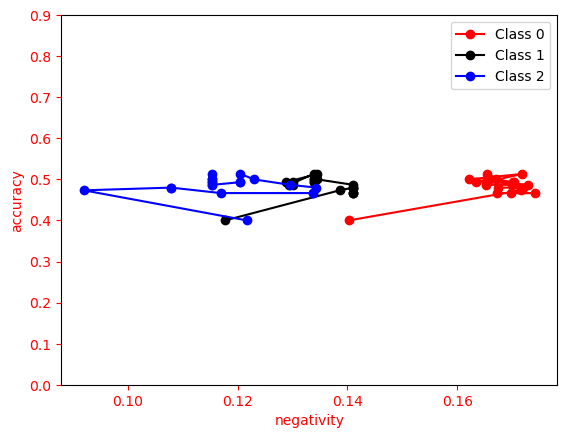

In [11]:
print_negativities(negativities_per_class, scores_list)

Entropies ao longo do treinamento
Classe 0 [2.7809371790762308e-15, 3.24691575627679e-15, 3.24691575627679e-15, 2.900439123660449e-15, -9.908553971975718e-16, -7.617896306172262e-16, 2.548693911425782e-15, 6.832158741135249e-15, 8.093718278168665e-15, 8.287821241004456e-15, 1.2841226486959884e-14, 1.4862472334065162e-14, 9.282662374100816e-15, 9.536482165971965e-15, 4.958142446399558e-15, 2.646004684240476e-15, 5.239857179316088e-16, 3.2837922388330586e-15, -3.063484600077176e-15, 4.385596951585356e-15]
Classe 1 [3.0564019468390487e-15, 2.6137824380797666e-15, 2.7676026882459794e-15, 2.7676026882459794e-15, 2.7676026882459794e-15, 2.7676026882459794e-15, 2.7676026882459794e-15, 2.7676026882459794e-15, 2.7676026882459794e-15, 2.7330001302716675e-15, 2.7330001302716675e-15, 2.683825968839853e-15, 1.8112707573916293e-15, 1.8112707573916293e-15, 1.7568999532793668e-15, 1.970526207934104e-15, 1.970526207934104e-15, 1.970526207934104e-15, 1.970526207934104e-15, 1.970526207934104e-15]
Classe 

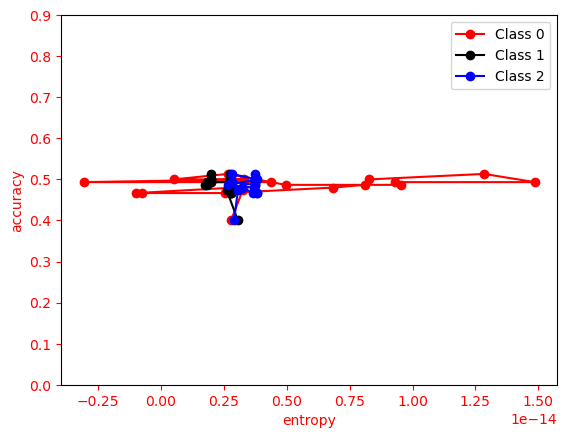

In [12]:
print_entropies(entropies_per_class, scores_list)